 le point x appartient à la classe  Ponderosa Pine


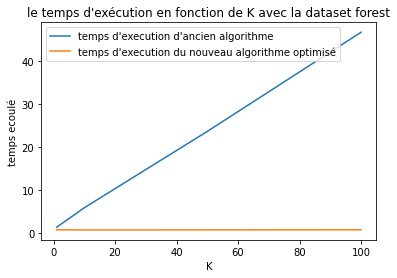

In [28]:
import pandas as pd
import numpy as np
import random as rd
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.datasets import fetch_covtype
import operator
import timeit
                       
#recuperation des noms des classes à partir de leurs numéros: nous avons utilisé le lien ci-dessus 
#https://rstudio-pubs-static.s3.amazonaws.com/160297_f7bcb8d140b74bd19b758eb328344908.html?fbclid=IwAR3y4WvR7hYI7gdrrpcGV8K18rSEU_-SbLFi7nONHb2WzvQ389Bew_QX2xA                 
def getClassNameForest(i):
   
    if i==1:
        return "Spruce/Fir"
    elif i==2:
        return "Lodgepole Pine"
    elif i==3:
        return "Ponderosa Pine"
    elif i==4:
        return "Cottonwood/Willow"
    elif i==5:
        return "Aspen"
    elif i==6:
        return "Douglas-fir"
    elif i==7:
        return "Krummholz"
    
#fonction qui permet de récuperer les valeurs d'une colonne precise correspondant à un point donné
#ici on l'utilise pour récuperer la classe qui correspond à un point donné
def getClasFromVal(XD,YD,valueX,valueY,targetCol,adf):
    c=df[targetCol][(adf[XD] == valueX) & (df[YD] == valueY)] 
    return c
                  
#pour calculer la proportion des differentes classes de forest
def getCountClasForest(XD,YD,targetCol,proche,adf):
    countCOne=0
    countCtwo=0
    countCthree=0
    countCfour=0
    countCfive=0
    countCSix=0
    countCSeven=0
    for i in range(len(proche)):
        (a,b) = proche[i]
        claslist=getClasFromVal(XD,YD,a,b,targetCol,adf)
        for elem in claslist:
            if elem==1:
                countCOne=countCOne+1
            elif elem==2:
                countCtwo=countCtwo+1
            elif elem==3:
                countCthree=countCthree+1
            elif elem==4:
                countCfour=countCfour+1
            elif elem==5:
                countCfive=countCfive+1
            elif elem==6:
                countCSix=countCSix+1
            elif elem==7:
                countCSeven=countCSeven+1
        
    return (countCOne,countCtwo,countCthree,countCfour,countCfive,countCSix,countCSeven)

#transforme sklearn to dataframe

def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(data=sklearn_dataset.data, 
    columns=sklearn_dataset.feature_names)
    # Ajout colonne variable à estimer
    df['target'] = sklearn_dataset.target
    return df
                       


#cacule la distance maximale dans une liste avec X
def maxDistance(list,x):
    maxD=distance(list[0],x)
    for elem in list:
        if distance(elem,x)> maxD:
            maxD=distance(elem,x)
    return maxD

# cette fonction permet de retourner l'indice d'element qui a la distance maximale avec x
def get_index_max_dis_L(list,x):
    max_j=0
    for j in range(len(list)):
        if distance(list[j],x)> distance(list[max_j],x):
            max_j=j
    return max_j

def distance (a, b):
    """Distance euclidienne entre deux points (espace à deux dimensions)

    Un point est représenté par un couple de valeurs flottantes.
    
    """    
    distance = sqrt( (b[0]-a[0])**2 + (b[1]-a[1])**2 )
    return distance

      #affiche les temps d'execution pour deux listes en fonction de K
def afficheTime(listK,listTime,listTime2):
    plt.plot(listK, listTime,label = "temps d'execution d'ancien algorithme")
    plt.plot(listK, listTime2, label = "temps d'execution du nouveau algorithme optimisé" )
    plt.xlabel('K')
    plt.ylabel("temps ecoulé")
    plt.title("le temps d'exécution en fonction de K avec la dataset forest")
    plt.legend()
    plt.show()
    
    
# premiére version d'algorithme avant optimisation  

def cherche_k_voisins_Prev(k, x, a, n):
    """Recherche des k plus proches voisins d'un point x, dans une collection a de n éléments.

    a est une liste.
    n et k sont des entiers tels que : 1 <= k < n.
    On considère que chaque élément représente un point d'un espace euclidien à deux dimensions.
    Un point est représenté par un couple de valeurs flottantes.

    """
    
    proches_voisins = [] #initialisation de la liste
    # pour i allant de 1 à k
    for i in range(k):
    # mettre le point A[i] dans proches_voisins
        proches_voisins.append(a[i])
    # pour i allant de k+1 à n
    for i in range(k,n):
#     si la distance entre A[i] et x est inférieure à la distance d'un des points de proches_voisins à x
            if distance(a[i],x) < maxDistance(proches_voisins,x) and a[i] not in proches_voisins:
                jm=get_index_max_dis_L(proches_voisins,x)
                del proches_voisins[jm]
                proches_voisins.append(a[i])
    return  proches_voisins 


#  version optimisée de l'algorithme chercher K voisins 
def cherche_k_voisins(k, x, a, n):
    """Recherche des k plus proches voisins d'un point x, dans une collection a de n éléments.

    a est une liste.
    n et k sont des entiers tels que : 1 <= k < n.
    On considère que chaque élément représente un point d'un espace euclidien à deux dimensions.
    Un point est représenté par un couple de valeurs flottantes.

    """
    #faire un tri sur A en se basant sur le critere de distance entre chaque point et X
    a=sorted(a, key=lambda e: distance(e, x))
    #recuperation des k premiers elements dans A
    proches_voisins = a[:k] #initialisation de la liste
    
    return  proches_voisins 


      #affiche
def affiche(x,a,n,k_voisins):
    """Affichage en deux dimensions : d'un point x, et d'un nuage de points à partir d'une liste a de n points.

    Un point est représenté par un couple de valeurs flottantes.
    x et ses voisins sont en bleu, les autres points sont en gris.
    Exemple d'utilisation de la librairie matplotlib.
    
    """
    # Création des deux tableaux (axe x et y) pour affichage des points de a (tableaux numpy)
    a=np.array(a)
    X,Y=zip(*a)
    # Création des deux tableaux (axe x et y) pour affichage des points de k_voisins (tableaux numpy)
    k_voisins=np.array(k_voisins)
    Xk,Yk=zip(*k_voisins)
# Affichage
    fig,ax = plt.subplots()
    plt.scatter(X,Y,label = "autres",c="gray")
    plt.scatter(Xk,Yk, label = "proche_voisin",c="blue")
    plt.scatter(x[0],x[1],label = "cible",c="blue",marker="x")
    plt.title("Les k_voisins les Plus Proches du point X ")
    plt.legend(loc="upper right")
    #calcul du rayon du cercle en fonction de la plus grande distance de X
    maxD=maxDistance(k_voisins,x)   
# Ajout d'un cercle 
    ax.add_artist(plt.Circle(x, maxD, edgecolor='b', facecolor='none'))#Circle(centre, rayon):
    plt.show()

# Programme principal

# Création des données
# Chargement du jeu de données et création d'une structure DataFrame Pandas
forest = fetch_covtype()
df = sklearn_to_df(fetch_covtype())
adf = pd.DataFrame(df, columns=["Elevation", "Slope","target"])

#récuperation des valeurs des variables caracteristiques dans X et Y 
X=df.loc[:,"Elevation"]
Y=df.loc[:,"Slope"]
a=list(zip(X,Y))
n= len(a)
x=(2386.0,17.0)


#determiner la classe majoritaire dans les K voisins 
k=10
k_voisins = cherche_k_voisins(k, x, a, n)
countClass= getCountClasForest("Elevation","Slope","target",k_voisins,adf)
print(" le point x appartient à la classe ",getClassNameForest(countClass.index(max(countClass))+1))

#appel des methodes chercher_k_voisins et affichage du temps d'execution pour chaque algorithme

timelistPrev=[]
timeListNew=[]
klist=[1,10,50,100]

for k in klist: 
    
    start = timeit.default_timer()
    k_voisins = cherche_k_voisins_Prev(k, x, a, n)
    end = timeit.default_timer()
    timelistPrev.append(end - start)
    start = timeit.default_timer()
    k_voisins = cherche_k_voisins(k, x, a, n)
    end = timeit.default_timer()
    timeListNew.append(end - start)

    #affichage du graphe de temps de comparaison entre les deux algorithmes     
afficheTime(klist,timelistPrev,timeListNew)


    
    